<a href="https://colab.research.google.com/github/abhatia903/Concept_Drift_Data/blob/main/KS_Test_Berkely.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
colnames=['Date','Time','Epoch','Moteid','Temperature','Humidity','Light','Voltage']
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.txt',names=colnames,sep=' ')
df.head()

,Date,Time,Epoch,Moteid,Temperature,Humidity,Light,Voltage
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [ ]:
df_1=df.iloc[:,[4,5,6,7]]

In [ ]:
df_1.describe()

,Temperature,Humidity,Light,Voltage
count,2.312781e+06,2.312780e+06,2.219804e+06,2.313156e+06
mean,3.920700e+01,3.390814e+01,4.072110e+02,2.492552e+00
std,3.741923e+01,1.732152e+01,5.394276e+02,1.795743e-01
min,-3.840000e+01,-8.983130e+03,0.000000e+00,9.100830e-03
25%,2.040980e+01,3.187760e+01,3.956000e+01,2.385220e+00
50%,2.243840e+01,3.928030e+01,1.582400e+02,2.527320e+00
75%,2.702480e+01,4.358550e+01,5.372800e+02,2.627960e+00
max,3.855680e+02,1.375120e+02,1.847360e+03,1.856000e+01


In [ ]:
df_1= df_1.dropna()

In [ ]:
df_low=df_1[df_1.Humidity<3.928030e+01]
df_high=df_1[df_1.Humidity>=3.928030e+01]

In [ ]:
df_low

,Temperature,Humidity,Light,Voltage
0,122.1530,-3.91901,11.04,2.03397
1,19.9884,37.09330,45.08,2.69964
2,19.3024,38.46290,45.08,2.68742
3,19.1652,38.80390,45.08,2.68742
4,19.1750,38.83790,45.08,2.69964
...,...,...,...,...
2313148,24.1730,21.65750,1729.60,2.78836
2313149,24.1436,21.73100,1729.60,2.78836
2313150,24.1436,21.65750,1670.72,2.78836
2313151,24.1240,21.58390,1670.72,2.78836


In [ ]:
from scipy import stats

p_value = 0.05

rejected = 0

for col in df_1.columns:

    test = stats.ks_2samp(df_low[col], df_high[col])

    if test[1] < p_value:

         rejected += 1

         print("Column rejected", col)

print("We rejected",rejected,"columns in total")

Column rejected Temperature
Column rejected Humidity
Column rejected Light
Column rejected Voltage
We rejected 4 columns in total


In [ ]:
pip install scikit-multiflow

     |████████████████████████████████| 1.1 MB 14.6 MB/s 


In [ ]:
df_1

,Temperature,Humidity,Light,Voltage
0,122.1530,-3.91901,11.04,2.03397
1,19.9884,37.09330,45.08,2.69964
2,19.3024,38.46290,45.08,2.68742
3,19.1652,38.80390,45.08,2.68742
4,19.1750,38.83790,45.08,2.69964
...,...,...,...,...
2313148,24.1730,21.65750,1729.60,2.78836
2313149,24.1436,21.73100,1729.60,2.78836
2313150,24.1436,21.65750,1670.72,2.78836
2313151,24.1240,21.58390,1670.72,2.78836


In [ ]:
t=df_1.columns

In [ ]:
t=t[:len(t)-1]

In [ ]:
k={}
c=0
from skmultiflow.drift_detection import ADWIN
adwin = ADWIN()
for col in t:
    data_stream=[]
    a = np.array(df_low[col])
    b = np.array(df_high[col])
    data_stream = np.concatenate((a,b))
  # Adding stream elements to ADWIN and verifying if drift occurred
    for i in range(len(data_stream)):
      adwin.add_element(data_stream[i])
      if adwin.detected_change():
        df_1.loc[i, 'Target']=1
        c=c+1
    print('Run')
      
    k[col]=c

Run
Run
Run


In [ ]:
df_1[df_1['Target']==1]

,Temperature,Humidity,Light,Voltage,Target
14,19.1064,39.0082,45.0800,2.6996,1.0000
393,22.8304,31.6312,478.4000,2.7370,1.0000
425,23.9182,30.4655,478.4000,2.7370,1.0000
447,24.4866,30.0401,478.4000,2.7370,1.0000
479,24.3494,30.6071,456.3200,2.7496,1.0000
...,...,...,...,...,...
1125001,NaN,NaN,NaN,NaN,1.0000
1206537,NaN,NaN,NaN,NaN,1.0000
2123753,NaN,NaN,NaN,NaN,1.0000
2134313,NaN,NaN,NaN,NaN,1.0000


In [ ]:
pip install  river

In [ ]:
from river.drift import PageHinkley
np.random.seed(12345)
ph = PageHinkley(threshold=10,min_instances=10)
# Update drift detector and verify if change is detected
for col in df_1:
  data_stream=[]
  a = np.array(df_low[col])
  b = np.array(df_high[col])
  data_stream = np.concatenate((a,b))
  for i, val in enumerate(data_stream):
     in_drift, in_warning = ph.update(val)
     if in_drift:
           print(f"Change detected at index {i} for column: {col} with input value: {val}")

Streaming output truncated to the last 5000 lines.
Change detected at index 2017184 for column: Light with input value: 279.68
Change detected at index 2017196 for column: Light with input value: 294.4
Change detected at index 2017215 for column: Light with input value: 309.12
Change detected at index 2017227 for column: Light with input value: 323.84
Change detected at index 2017255 for column: Light with input value: 323.84
Change detected at index 2017268 for column: Light with input value: 338.56
Change detected at index 2017301 for column: Light with input value: 338.56
Change detected at index 2017344 for column: Light with input value: 353.28
Change detected at index 2017677 for column: Light with input value: 1729.6
Change detected at index 2018685 for column: Light with input value: 121.44
Change detected at index 2018694 for column: Light with input value: 150.88
Change detected at index 2018703 for column: Light with input value: 397.44
Change detected at index 2018734 for c

In [ ]:
import matplotlib.pyplot as plt

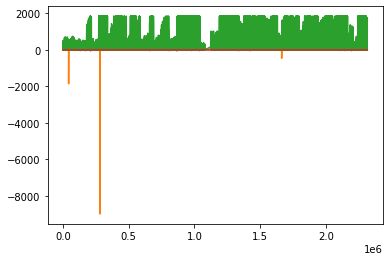

In [ ]:
plt.plot(df_1)


## Reservoir Sampling

In [ ]:

import random

def selectKItems(stream, n, k):
            
                    
            i=0;
            # index for elements
            # in stream[]

            # reservoir[] is the output
            # array. Initialize it with
            # first k elements from stream[]
            reservoir = [0]*k;
            for i in range(k):
                reservoir[i] = stream[i];

            # Iterate from the (k+1)th
            # element to nth element
            while(i < n):
                # Pick a random index
                # from 0 to i.
                j = random.randrange(i+1);

                # If the randomly picked
                # index is smaller than k,
                # then replace the element
                # present at the index
                # with new element from stream
                if(j < k):
                    reservoir[j] = stream[i];
                i+=1;
            return reservoir



In [ ]:
n=10
stream=np.array(df_1['Light'])
t=selectKItems(stream, n, 1000)


In [ ]:
from river.drift import PageHinkley
np.random.seed(12345)
ph = PageHinkley(threshold=10,min_instances=10)
# Update drift detector and verify if change is detected
for col in df_1:
  data_stream=[]
  a = np.array(df_low[col])
  b = np.array(df_high[col])
  data_stream = np.concatenate((a,b))
  for i, val in enumerate(data_stream):
     in_drift, in_warning = ph.update(val)
     if in_drift:
           print(f"Change detected at index {i} for column: {col} with input value: {val}")

Streaming output truncated to the last 5000 lines.
Change detected at index 2017184 for column: Light with input value: 279.68
Change detected at index 2017196 for column: Light with input value: 294.4
Change detected at index 2017215 for column: Light with input value: 309.12
Change detected at index 2017227 for column: Light with input value: 323.84
Change detected at index 2017255 for column: Light with input value: 323.84
Change detected at index 2017268 for column: Light with input value: 338.56
Change detected at index 2017301 for column: Light with input value: 338.56
Change detected at index 2017344 for column: Light with input value: 353.28
Change detected at index 2017677 for column: Light with input value: 1729.6
Change detected at index 2018685 for column: Light with input value: 121.44
Change detected at index 2018694 for column: Light with input value: 150.88
Change detected at index 2018703 for column: Light with input value: 397.44
Change detected at index 2018734 for c

In [ ]:
from river.drift import PageHinkley
np.random.seed(12345)
ph = PageHinkley(threshold=10,min_instances=10)
n = len(stream);

    
t=selectKItems(stream, n, 1000)
for i, val in enumerate(t):
    in_drift, in_warning = ph.update(val)
    if in_drift:
        print(f"Change detected at index {i} for column: {col} with input value: {val}")
   

NameError: ignored

In [ ]:
plt.plot(df_1['Light'])

KeyError: ignored

In [ ]:
for i in range(1,1000,200):
    print(i)

1
201
401
601
801


In [ ]:
k_page={}
c=0
from river.drift import PageHinkley
np.random.seed(12345)
ph = PageHinkley(threshold=10,min_instances=10)
# Update drift detector and verify if change is detected
for col in df_1:
      data_stream=[]
      a = np.array(df_low[col])
      b = np.array(df_high[col])
      data_stream = np.concatenate((a,b))
      

    
      for i, val in enumerate(data_stream):
         in_drift, in_warning = ph.update(val)
         if in_drift:
               c=c+1

               print(f"Change detected at index {i} for column: {col} with input value: {val}")
      k_page[col]=c
      c=0

Streaming output truncated to the last 5000 lines.
Change detected at index 2017184 for column: Light with input value: 279.68
Change detected at index 2017196 for column: Light with input value: 294.4
Change detected at index 2017215 for column: Light with input value: 309.12
Change detected at index 2017227 for column: Light with input value: 323.84
Change detected at index 2017255 for column: Light with input value: 323.84
Change detected at index 2017268 for column: Light with input value: 338.56
Change detected at index 2017301 for column: Light with input value: 338.56
Change detected at index 2017344 for column: Light with input value: 353.28
Change detected at index 2017677 for column: Light with input value: 1729.6
Change detected at index 2018685 for column: Light with input value: 121.44
Change detected at index 2018694 for column: Light with input value: 150.88
Change detected at index 2018703 for column: Light with input value: 397.44
Change detected at index 2018734 for c

In [ ]:
k

{'Humidity': 1658, 'Light': 3664, 'Temperature': 1321, 'Voltage': 3669}

In [ ]:
k_page

{'Humidity': 32201, 'Light': 62324, 'Temperature': 30841, 'Voltage': 85}

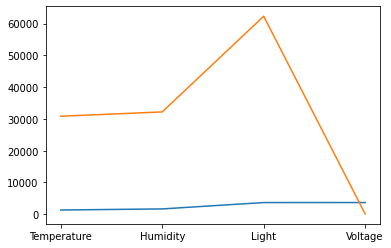

In [ ]:
plt.plot(list(k.keys()), list(k.values()))
plt.plot(list(k_page.keys()), list(k_page.values()))

In [ ]:
df['Target'].unique()

array([0, 1])

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
import numpy as np

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df_1)

In [ ]:

from sklearn.model_selection import train_test_split
# create dataset
X, y = dataset,df_1['Target']
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1997959, 5) (221996, 5) (1997959,) (221996,)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(10, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['get_f1'])

history = model.fit(X_train, y_train, epochs=5, batch_size=256, validation_data=(X_test, y_test), verbose=1, shuffle=False)

model.summary()

Epoch 1/5


ValueError: ignored

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(X_train, y_train, epochs=1, batch_size=256, validation_data=(X_test, y_test), verbose=1, shuffle=False)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)


7805/7805 [==============================] - 29s 3ms/step - loss: nan - acc: 0.9984 - f1_m: nan - precision_m: nan - recall_m: nan - val_loss: nan - val_acc: 0.9983 - val_f1_m: nan - val_precision_m: nan - val_recall_m: nan


In [ ]:
loss

nan

In [ ]:
accuracy

0.9983152747154236

In [ ]:
f1_score

nan

In [ ]:
precision

nan

In [ ]:
recall

nan